### とりあえずいろいろ見てみる

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport # profile report を作る用
from matplotlib_venn import venn2 # venn図を作成する用
import glob

In [2]:
out_dir = '../output/'
data = "../datasets/"

In [3]:
train_df = pd.read_csv(data + "train.csv")
test_df = pd.read_csv(data + "test.csv")

In [4]:
train_df.head().T

,0,1,2,3,4
object_id,0011d6be41612ec9eae3,0012765f7a97ccc3e9e9,0017be8caa87206532cb,00181d86ff1a7b95864e,001c52ae28ec106d9cd5
art_series_id,93c092ba70beab248f31,95c14fb11c54281ad7e0,4c406890d208fe01f8fb,fa0891535500a4973db2,8065ed5063c5887e677d
title,The Avenue of Birches,Struik in bloei,Portret van een vrouw,A St Bernard Dog,Woelige zee met zeilschepen
description,NaN,NaN,"Portret van eenvrouw, zittend naast een tafel.","Een sint-bernardshond, staand in een landschap...",Woelige zee met zeilschepen.
long_title,"The Avenue of Birches, Jan Hackaert, 1660 - 1685","Struik in bloei, Richard Tepe (attributed to),...","Portret van een vrouw, Tresling & Comp., 1860 ...","A St Bernard Dog, Bernard te Gempt, c. 1850 - ...","Woelige zee met zeilschepen, anonymous, 1825 -..."
principal_maker,Jan Hackaert,Richard Tepe,Tresling & Comp.,Bernard te Gempt,anonymous
principal_or_first_maker,Jan Hackaert,Richard Tepe,Tresling & Comp.,Bernard te Gempt,anonymous
sub_title,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,h 165mm × w 223mm,h 87mm × w 56mm,h 179cm × w 248cm × t 4cm,h 13cm × w 17.5cm × d 0.7cm
copyright_holder,NaN,erven Richard Tepe,NaN,NaN,NaN
more_title,The Avenue of Birches,Struik in bloei,Portret van een vrouw,A St Bernard Dog,Woelige zee met zeilschepen


In [5]:
test_df.head().T

,0,1,2,3,4
object_id,000405d9a5e3f49fc49d,001020bd00b149970f78,00133be3ff222c9b74b0,001b2b8c9d3aa1534dfe,00220cd4bfa082d2aa20
art_series_id,a2aabd3cc8859f4260ad,5d6a286cc3ab64c2c043,e2cbc48624f787d2edd2,2435b200cca8b2f3ce3a,aa03c5a95d229166982f
title,Twee personen voor de Duizendjarige den te Wol...,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Alva eist de Tiende Penning op, 1569","Groepen uit ""Zes meisjes en geen man"" ten Gouv...",Christus op een voetstuk met rondom zijn voorv...
description,NaN,"Portret van Philip Ernst (1585-1629), graaf va...",De hertog van Alva eist in een vergadering van...,"Scène uit de opvoering getiteld ""Zes meisjes e...",In het midden staat Christus op een voetstuk. ...
long_title,Twee personen voor de Duizendjarige den te Wol...,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Alva eist de Tiende Penning op, 1569, Theodoor...","Groepen uit ""Zes meisjes en geen man"" ten Gouv...",Christus op een voetstuk met rondom zijn voorv...
principal_maker,Bernardus Bruining,Jan Antonisz van Ravesteyn,Theodoor Koning,Théodore van Lelyveld,Jan Luyken
principal_or_first_maker,Bernardus Bruining,Jan Antonisz van Ravesteyn,Theodoor Koning,Théodore van Lelyveld,Jan Luyken
sub_title,h 167mm × w 108mm,h 29.7cm × w 24.1cm,h 270mm × w 215mm,h 116mm × w 159mm,h 108mm × w 184mm
copyright_holder,NaN,NaN,NaN,erven Théodore van Lelyveld,NaN
more_title,Twee personen voor de Duizendjarige den te Wol...,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Alva eist de Tiende Penning op, 1569 Vordering...","Groepen uit ""Zes meisjes en geen man"" ten Gouv...",Christus op een voetstuk met rondom zijn voorv...


In [6]:
if not os.path.exists(out_dir+ 'train_report.html'):
    train_report = ProfileReport(train_df)
    path_train_report = 'train_report.html'
    # if(not os.path.exists(out_dir + path_train_report)):
    train_report.to_file(os.path.join(out_dir, 'train_report.html'))
    print("create train_report.html")



In [40]:
def create_report(files, out_dir):
    for file in files:
        df = pd.read_csv(file)
        file = file.split('/')[2].split('.')[0]
        path_report = out_dir + file + '_report.html'
        if(not os.path.exists(path_report)):
            report = ProfileReport(df)
            report.to_file(os.path.join(path_report))
            print('create ' + path_report)

In [16]:
datasets = glob.glob(data+'*')

In [41]:
create_report(datasets, out_dir)

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

create ../output/technique_report.html


Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

create ../output/color_report.html


Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

create ../output/maker_report.html


Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

create ../output/principal_maker_report.html


Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

create ../output/palette_report.html


Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

create ../output/material_report.html


Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

create ../output/historical_person_report.html


Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

create ../output/production_place_report.html


Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

create ../output/object_collection_report.html


Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

create ../output/principal_maker_occupation_report.html


In [26]:
file = 'technique.csv'
technique_df = pd.read_csv(data+'technique.csv')
create_report(technique_df, file, out_dir)

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

create ../output/technique.csv_report.html


In [29]:
file = 'object_collection.csv'
technique_df = pd.read_csv(data+file)
create_report(technique_df, file, out_dir)

In [29]:
file = 'object_collection.csv'
technique_df = pd.read_csv(data+file)
create_report(technique_df, file, out_dir)

In [6]:
if not os.path.exists(out_dir+ 'train_report.html'):
    train_report = ProfileReport(train_df)
    path_train_report = 'train_report.html'
    # if(not os.path.exists(out_dir + path_train_report)):
    train_report.to_file(os.path.join(out_dir, 'train_report.html'))
    print("create train_report.html")



In [7]:
path_test_report = 'test_report.html'
if not os.path.exists(out_dir+ path_test_report):
    test_report = ProfileReport(test_df)
    # if(not os.path.exists(out_dir + path_test_report)):
    test_report.to_file(os.path.join(out_dir, path_test_report))
    print("create test_report.html")



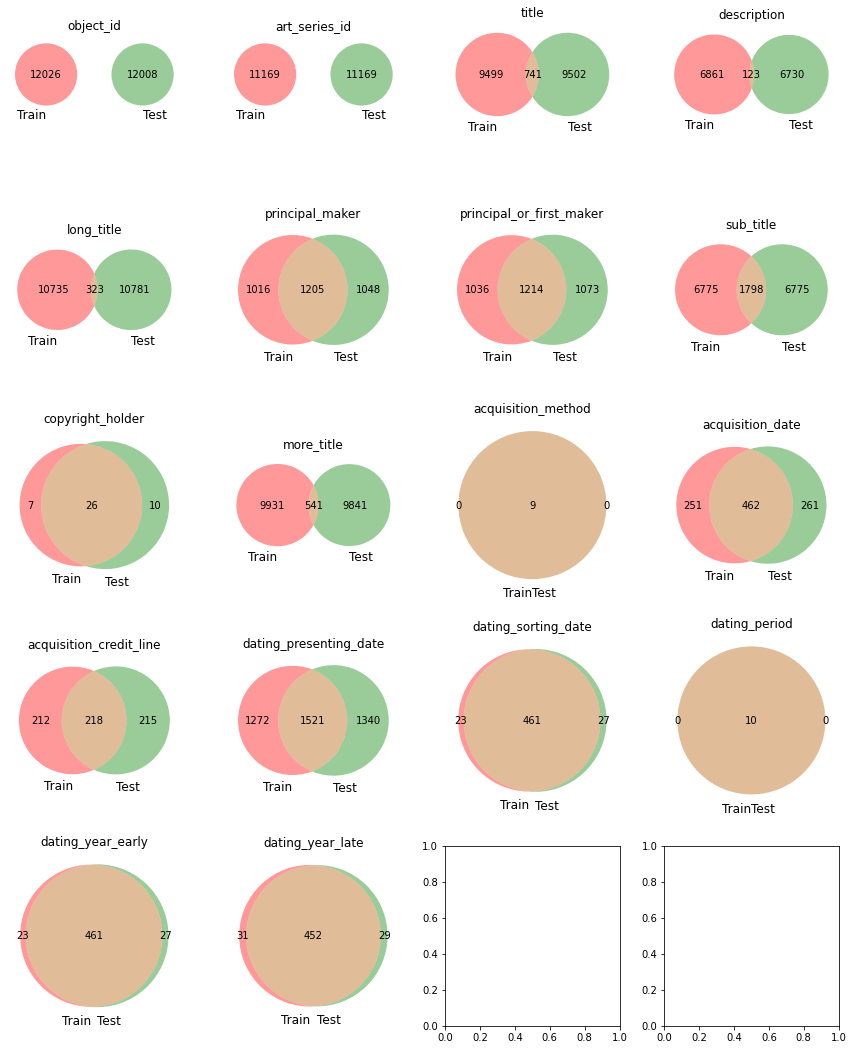

In [9]:
columns = test_df.columns
n_figs = len(columns)
n_cols = 4
n_rows = n_figs // n_cols + 1

fig, axes = plt.subplots(figsize=(n_cols * 3, n_rows * 3), ncols=n_cols, nrows=n_rows)

for c, ax in zip(columns, axes.ravel()):
    venn2(
        subsets=(set(train_df[c].unique()), set(test_df[c].unique())),
        set_labels=('Train', 'Test'),
        ax=ax
    )
    ax.set_title(c)

fig.tight_layout()

In [20]:
material = pd.read_csv('../datasets/material.csv')

In [22]:
material.head()

,object_id,name
0,000405d9a5e3f49fc49d,photographic paper
1,000405d9a5e3f49fc49d,cardboard
2,001020bd00b149970f78,oil paint (paint)
3,001020bd00b149970f78,panel
4,0011d6be41612ec9eae3,oil paint (paint)


In [23]:
cross_material = pd.crosstab(material['object_id'], material['name'])

In [26]:
cross_material.shape

(23586, 77)

In [28]:
train_df = train_df.merge(cross_material, on = 'object_id',how='left' )

In [31]:
train_df.head()

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,...,textile materials,tin (metal),tin alloy,tracing paper,transparant paper,velvet (fabric weave),watercolor (paint),wax,wood (plant material),wood board
0,0011d6be41612ec9eae3,93c092ba70beab248f31,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,NaN,The Avenue of Birches,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0012765f7a97ccc3e9e9,95c14fb11c54281ad7e0,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0017be8caa87206532cb,4c406890d208fe01f8fb,Portret van een vrouw,"Portret van eenvrouw, zittend naast een tafel.","Portret van een vrouw, Tresling & Comp., 1860 ...",Tresling & Comp.,Tresling & Comp.,h 87mm × w 56mm,NaN,Portret van een vrouw,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00181d86ff1a7b95864e,fa0891535500a4973db2,A St Bernard Dog,"Een sint-bernardshond, staand in een landschap...","A St Bernard Dog, Bernard te Gempt, c. 1850 - ...",Bernard te Gempt,Bernard te Gempt,h 179cm × w 248cm × t 4cm,NaN,A St Bernard Dog,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001c52ae28ec106d9cd5,8065ed5063c5887e677d,Woelige zee met zeilschepen,Woelige zee met zeilschepen.,"Woelige zee met zeilschepen, anonymous, 1825 -...",anonymous,anonymous,h 13cm × w 17.5cm × d 0.7cm,NaN,Woelige zee met zeilschepen,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
